In [2]:
import sys; sys.path.append('../src/sde_hjb_solver')

import numpy as np

from hjb_solver_2d_st import SolverHJB2D
from controlled_sde_2d import TripleWellCommittor2D
from base_parser import get_base_parser

## Triple well committor setting

The committor setting with a triple well potential in 2d can be found in *[Metzner, 2007]* and *[Hartmann et. al, 2014]* for
* low metastability: $\beta=5/3$ ($\beta^{-1} = 0.6$)
* high metastability: $\beta=20/3$ ($\beta^{-1} = 0.15$)

In [3]:
# initialize controlled sde object
sde = TripleWellCommittor2D(beta=20/3)

# initialize hjb solver object
sol_hjb = SolverHJB2D(sde, h=5e-2)

In [4]:
# compute hjb solution 
sol_hjb.solve_bvp()
sol_hjb.compute_value_function()
sol_hjb.compute_optimal_control()

In [5]:
# report
#sol_hjb.write_report(x=-1)

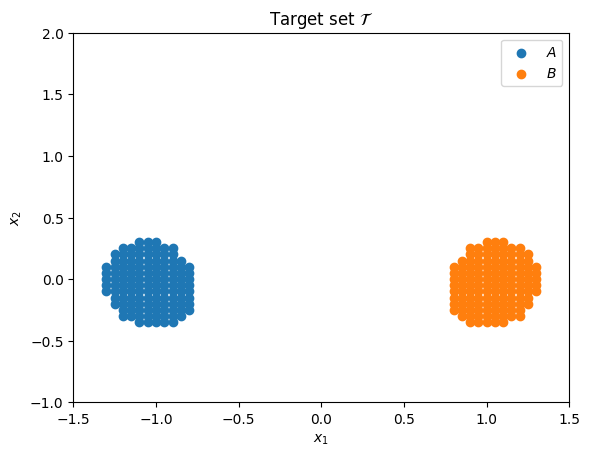

In [6]:
# plot target sets
sde.plot_target_set()

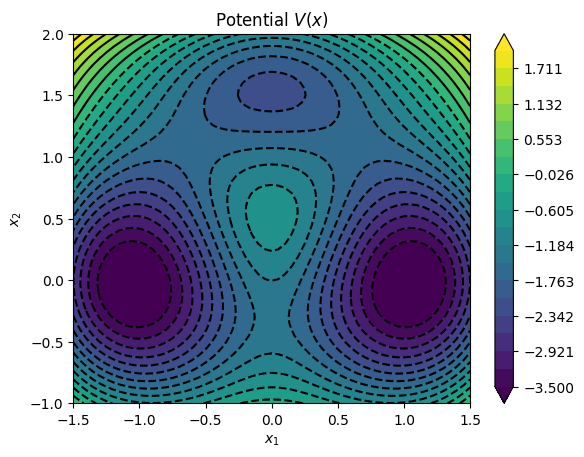

In [7]:
# plot potential
sde.plot_2d_potential(levels=np.linspace(sde.ts_pot_level, 2, 20))

**Plots**

In [8]:
# evaluate in grid
sol_hjb.get_perturbed_potential_and_drift()

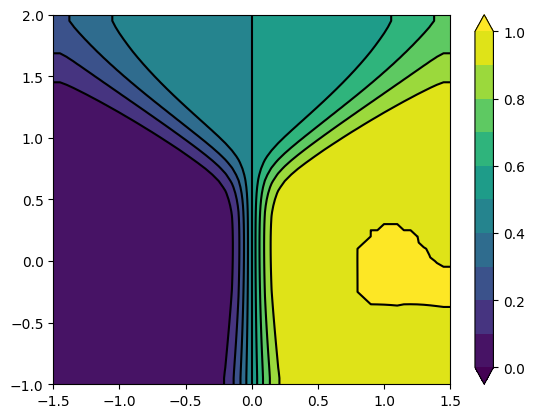

In [9]:
from matplotlib import pyplot as plt
sol_hjb.psi.reshape(sde.Nh)[sde.ts_b_idx] += sde.epsilon

levs=np.linspace(0, 1, 11)
fig, ax = plt.subplots()
cs = ax.contourf(
    sde.domain_h[:, :, 0],
    sde.domain_h[:, :, 1],
    np.around(sol_hjb.psi, decimals=25),
    levs,
    extend='both',
)
ax.contour(cs, colors='k') 
cbar = fig.colorbar(cs)

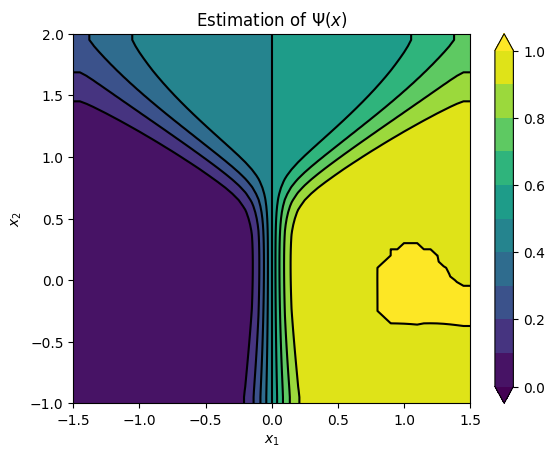

In [10]:
sol_hjb.plot_2d_psi(levels=np.linspace(0, 1, 11))
#sol_hjb.plot_2d_value_function()
#sol_hjb.plot_2d_perturbed_potential(levels=np.linspace(-3.5, 5, 20))

In [15]:
#sol_hjb.plot_2d_control(scale=None, width=0.005)
#sol_hjb.plot_2d_perturbed_drift()